# Does disney studios should make more action and adventure movies?

## 1- Extract Data

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
gross = pd.read_csv('disney_movies_total_gross.csv', parse_dates = [1])

gross.head()
gross.inflation_adjusted_gross = gross.inflation_adjusted_gross * 1e-6

## 2- Exploratory Data Analysis

In [3]:
gross = gross.sort_values('inflation_adjusted_gross', ascending=False)
gross.head(10)


,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228.953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188.229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187.090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362.870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236.035515
3,Song of the South,1946-11-12,Adventure,G,65000000,1078.510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936.662225
4,Cinderella,1950-02-15,Drama,G,85000000,920.608730
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789.612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761.640898


In [19]:
gross['release_year'] = gross.release_date.dt.year # Extract year
group = gross.groupby(['genre','release_year']).mean() # Avg gross for each genre per year
group.reset_index()

,genre,release_year,total_gross,inflation_adjusted_gross
0,Action,1981,0.0,0.000000
1,Action,1982,26918576.0,77.184895
2,Action,1988,17577696.0,36.053517
3,Action,1990,59249588.5,118.358772
4,Action,1991,28924936.5,57.918572
...,...,...,...,...
213,Western,1995,8247627.0,15.983331
214,Western,2000,56932305.0,89.042541
215,Western,2003,58331254.0,81.547672
216,Western,2004,44846546.5,60.878640


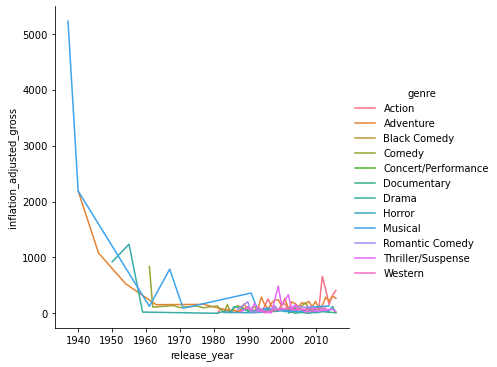

In [5]:
genre_yearly = group.reset_index()

sns.relplot(kind='line', data = genre_yearly, x = 'release_year', y='inflation_adjusted_gross'
            , hue='genre');

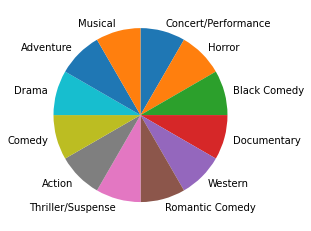

In [22]:
genre_inflation = genre_yearly[['genre', 'inflation_adjusted_gross']].groupby('genre').sum()

genre_inflation = genre_inflation.sort_values('inflation_adjusted_gross')

sorted_counts = genre_inflation['inflation_adjusted_gross'].value_counts()

plt.pie(sorted_counts, labels = [x for x in genre_inflation.index], startangle = 90, counterclock = False);


## 3 - Data transformation and Modeling

In [7]:
genre_dummies =  pd.get_dummies(gross.genre, drop_first=True)

genre_dummies.head()

,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0


In [8]:
import statsmodels.api as sm

df = pd.concat([genre_dummies, gross.inflation_adjusted_gross], axis=1)
df.head()

,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western,inflation_adjusted_gross
0,0,0,0,0,0,0,0,1,0,0,0,5228.953251
1,1,0,0,0,0,0,0,0,0,0,0,2188.229052
2,0,0,0,0,0,0,0,1,0,0,0,2187.090808
8,0,0,1,0,0,0,0,0,0,0,0,1362.870985
6,0,0,0,0,0,1,0,0,0,0,0,1236.035515


In [9]:
df['intercept'] = 1



lm = sm.OLS(df['inflation_adjusted_gross'], df.iloc[:,np.r_[0:len(df.columns)-2, -1]])
results =lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     inflation_adjusted_gross   R-squared:                       0.111
Model:                                  OLS   Adj. R-squared:                  0.093
Method:                       Least Squares   F-statistic:                     6.404
Date:                      Fri, 08 Oct 2021   Prob (F-statistic):           4.69e-10
Time:                              17:59:45   Log-Likelihood:                -4062.2
No. Observations:                       579   AIC:                             8148.
Df Residuals:                           567   BIC:                             8201.
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Adventure              87.4757     43.327      2.019      0.044       2.374     172.578
Black Comedy          -50.6783    161.368     -0.314      0.754    -367.630     266.273
Comedy                -18.2540     41.349     -0.441      0.659     -99.470      62.962
Concert/Performance   -45.5109    195.980     -0.232      0.816    -430.447     339.425
Documentary           -90.2037     77.073     -1.170      0.242    -241.587      61.180
Drama                 -31.0287     44.192     -0.702      0.483    -117.829      55.772
Horror                -79.5079    116.922     -0.680      0.497    -309.161     150.145
Musical               500.6761     77.073      6.496      0.000     349.292     652.060
Romantic Comedy       -25.1447     67.295     -0.374      0.709    -157.323     107.033
Thriller/Suspense     -13.2680     66.289     -0.200      0.841    -143.469     116.933
Western               -29.1061    109.104     -0.267      0.790    -243.404     185.192
intercept             102.9218     36.083      2.852      0.004      32.049     173.794
==============================================================================
Omnibus:                      978.698   Durbin-Watson:                   0.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           599532.320
Skew:                          10.172   Prob(JB):                         0.00
Kurtosis:                     159.324   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Let's Hack statsmodels.api !

In [10]:
import numpy as np

size = 500
bs_action_reps =  np.empty(size)
bs_adventure_reps =  np.empty(size)


In [11]:
df = df.drop('intercept', axis=1)

In [12]:
df.head()

,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western,inflation_adjusted_gross
0,0,0,0,0,0,0,0,1,0,0,0,5228.953251
1,1,0,0,0,0,0,0,0,0,0,0,2188.229052
2,0,0,0,0,0,0,0,1,0,0,0,2187.090808
8,0,0,1,0,0,0,0,0,0,0,0,1362.870985
6,0,0,0,0,0,1,0,0,0,0,0,1236.035515


## Confidence intervals, P-values

In [13]:
from sklearn.linear_model import LinearRegression

for i in range(size):
        
    sample = df.sample(frac=1, replace=True)
   
    regr = LinearRegression().fit(sample.drop('inflation_adjusted_gross',axis=1), sample['inflation_adjusted_gross'])
    
    bs_action_reps[i] = regr.intercept_
    bs_adventure_reps[i] = regr.coef_[[0]][0]

In [14]:
confidence_interval_action = np.array([np.percentile(bs_action_reps, 2.5), np.percentile(bs_action_reps, 97.5)])
confidence_interval_adventure = np.array([np.percentile(bs_adventure_reps, 2.5), np.percentile(bs_adventure_reps, 97.5)])
    
print(confidence_interval_action)
print(confidence_interval_adventure)

[ 70.74257916 138.92915069]
[ 30.65761429 141.31082621]


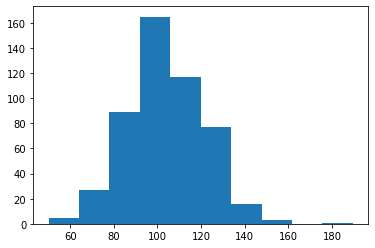

In [15]:
plt.hist(bs_action_reps);

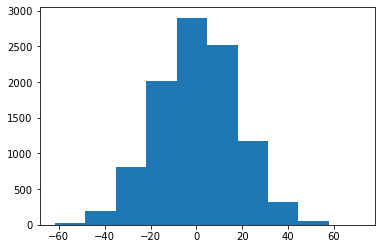

In [16]:
simulated_under_null = np.random.normal(0, np.std(bs_action_reps), 10000)
plt.hist(simulated_under_null);

In [17]:
p_val = ((simulated_under_null < -8.748e7) & (simulated_under_null > 8.748e7)).mean()
p_val

0.0